# SARP-East Coding Lesson 7 - Datetimes
12 July 2024
<br>Riley McCue

## 🛌🏼 🛌🏼 🛌🏼 *"Sometimes it's pays to stay in bed on Monday, rather than spending the rest of the week debugging Monday's code."* 🛌🏼 🛌🏼 🛌🏼 
<br>-Dan Salomon

[OFFICE HOUR SIGNUP](https://docs.google.com/spreadsheets/d/1EDDZ7jxGzhFhAQeKTjtLBmbVYn3H6v1zb6QHUAIKUjA/edit?usp=sharing)

What do we always start with as earth science researchers? Data. Let's get some data.

# 📂 Opening Our Data

Let's check out some [bouy data!](https://buoybay.noaa.gov/data/data-download) ⛵
<br> Select the following
1. Station: First Landing (FL)
2. Year: 2019
3. Type: Ocean
<br> --> Get URL for download
<br> You will likley have to enable pop-up browsers.
<br> Fun fact: This data was taken from a bouy by the bridge we had to cross to go to Wallops!

You know the drill by now:
1. Download your data into the cloud
2. Enter your filepath in below

This is **tabular** data, so we will be using `pandas`.

In [ ]:
#Imports pandas library

In [ ]:
#Opens data
df = pd.read_csv('FILEPATH')

In [ ]:
#I'm cleaning up the data a bit...

#Drops first and second row of string labels
df = df.drop([0,1])
#Drops columns with QC (they are just unecessary).
df = df.drop(['Temperature QC','Salinity QC', 'Chlorophyll QC', 'Turbidity QC', 'Oxygen QC', 'Waves QC'], axis=1)
#Saves temperature values as floats rather than strings
df['Temperature'] = df['Temperature'].astype(float)

Let's view our Dataframe.

In [ ]:
#View Dataframe


We are interested in temperature here. Let's plot our temperature series to get an idea of what we are looking at.

In [ ]:
#Plot 'Temperature' series


A plot! Woohoo! But what is this telling us? When was this taken?

# Our Data is Open... Now what?

## 🔎 Finding a New Library

It'd be great if we had DATES and TIMES on our plot, and if we could organize our data by dates and times.

Hmmmm..... I wonder if there are any available libraries in Python for working with dates and times?

:::{admonition} Activity
:class: note
Google "Python library dates and times" and try to find the following:
1. A Python library that helps us manipulate dates and times.
2. Some classes, attributes, objects, etc. of this library.
3. Some general syntax to utilize this library.
4. What we can use this library for?

<!-- https://docs.python.org/3/library/datetime.html -->

## 📖 Documentation

As we are becoming independent programmers, the ability to read documentation is a huge skill to develop. Being said, it also has a huge learning curve (similar to the nature of coding in general). 

You all will have to use libraries and classes and functions that you have never seen or heard of before as you get deeper and deeper into your projects. Even though it is hard, you are capable!

Some things to note about documention:
1. Documentation is not meant to be read thoroughly from top to botom (usually). The amount you have to read will depend on how in-depth you will be using it and your current knowledge of it.
2. YOU SHOULD NOT UNDERSTAND EVERYTHING HERE.
3. While it can be overwhelming at first, documentation is our FRIEND. It is everything the authors left us to be able to use their new programming tool.
4. TIP: If you run into errors, you can `Command+f` the documentation to see if that specific error holds a certain meaning.
5. Important things to look for are: Required input arguements, the purpose of the libarry, available functions, attributes, classes, methods, and maybe some examples.

If you really want to get more into programming, I would get comfortable reading documentation.

## 🕰️ `Datetime` Library

You all likely found [this link](https://docs.python.org/3/library/datetime.html#datetime.date.month). This is the main datetime library in Python.

What did we learn from our searching?
<!-- <br>PURPOSE:
<br>CLASSES:
<br>ATTRIBUTES: -->

Pandas has their own datetime functions built in. However, they are all built off of this main datetime library, and the concepts hold true.

We will be utilizing pandas `.to_datetime()` function here ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)).

Big picture concept: The `datetime` library takes dates saved as other data types (usually strings) and saves them in a formatted object that allows python to efficiently read the different parts of a datetime (day, month, year, minute, second,...).

### ⏳ Datetime Objects

Let's convert our column of strings 'Time (UTC)' to a column of datetimes.

The syntax for the pandas `.to_datetime()` method is:


`pd.to_datetime(column, format=`[check me out!](https://strftime.org/))


#### ⛵ To our Data
First, let's see what our time objects currently look like.

In [ ]:
#Views a specific time object.


and let's see what data type this is...

In [ ]:
#Checks data type() of our time object.


We want to make these strings `datetimes` -- let's do the whole column.

In [ ]:
#Let's convert our 'Time (UTC)' column to datetimes.


The `format=` command is to tell the computer how our datetime is currently saved in the string. We need to give it the skeleton, and there are special simplified commands for this.

Now, let's save these datetime objects as a column.

In [ ]:
# We are going to rewrite our old column.


In [ ]:
# Let's look at the datatype of a value in our new datetime column 


WOOHOO! We created our first datetime objects!

In [ ]:
# Let's view our dataframe now.


Now that these are datetime objects, we can do lots of fun stuff.
<br> Examples of attributes:
* .date
* .time
* .year
* .month
* .day
* .day_of_week
* .hour
* .minute
* .second

Syntax
```
data_series.dt.ATTRIBUTE
```

In [ ]:
#Let's view just the dates from our data


:::{admonition} Practice Problem
:class: tip
1. Select just the months from your datetimes.
2. Save this as a new column in your Dataframe.

:::{admonition} Extra Level
:class: dropdown
After creating your column of months, find the mean temperature values over each month (Hint: groupby).

Let's set our datetime series as the index.

In [ ]:
#Sets column 'Time (UTC)' as index and rewrites over the dataframe


In [ ]:
#Let's view our data now.


Let's try plotting again, and see if anything has changed.

In [ ]:
#Plot our data.

We can see that the horizontal axis is labeled with dates now! Python knows very well how to handle datetime objects once we create them.

### 🧹🧹🧹 How can we clean this up more?
This plot is better, but it's not great. 

We are given hourly values, but we really only need an average over each day. 

# **LET'S ASK GOOGLE** how we might do this.
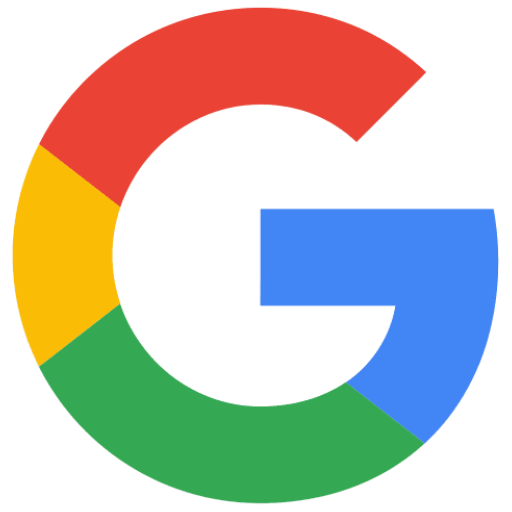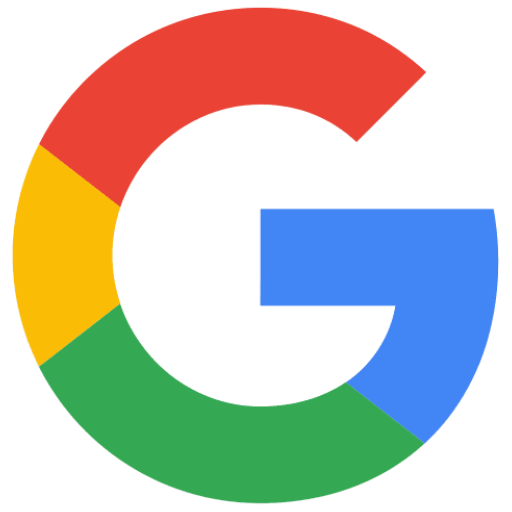 

<!-- Target: .resample() -->

### `Resampling`
It looks like `pandas` has a [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample) method we can apply to DataFrames, which is specifically made to utilize datetimes.

The general syntax is:
```
data_structure.resample(timeframe).aggregation()
```
Let's resample our temperatures values to be by day rather than by hour.

In [ ]:
#Use .resample() to find the daily averages


In [ ]:
#And let's plot it!


Much of the noise is gone, and this plot looks much better now. We can see that Python has labeled our horizontal axis by just month now too!

Other timeframe options for resampling are:
* '#min' = # minutes
* '#h' = # hours
* '#D' = # days
* '#W' = # weeks
* '#ME' = # months
* '#YE' = # years

Note: The smaller "timescale" you use, the longer the computation takes. For example, grouping by '1h' is significantly quickly than grouping by '60min', although they are the same amount of time. 

:::{admonition} Extra: `timedelta`
:class: dropdown
A timedelta object represents a duration -- the difference between two datetime or date instances. For those of you who want to chunk your data by even increments of dates or times, it may be of interest to you.

For more info, check out [this link](https://docs.python.org/3/library/datetime.html#timedelta-objects) and click **timedelta** in the Table of Contents on the left. 

# 🏁 Wrap-up: Think & Pair!
## Think!
Take a few minutes and review on your own what you learned. How might you use datetimes in your research?
## Pair!
Take a few minutes and discuss at your table what you learned today.

### 🎊YAYYYY - seventh coding lesson is complete!
I am so proud of you all for how hard you have worked on coding thus far! There has been A LOT of information for you all, and I have no expectations that you would absorb all of it. I hope that you learned a few things, and that I have planted the seed for many other topics you may dive deeper into in the future. And most importantly, I hope you have improved your relationship with coding and increased your confidence! Remember, if you are struggling, you are learning, and that is the only thing between where you are now and where you want to be!


<br> 🇩🇪Prost und Guten Tag!
<br> 🇪🇸¡Saludos y Buen Día!
<br> 🇵🇹Felicidades e bom dia!
<br> 🇬🇧Cheers and Good Day!